In [ ]:
# Notebook created by Mahdiyeh Behjat Khatooni
# Date: 2023

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn import datasets, metrics, svm
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.metrics import roc_auc_score

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data preparation

In [ ]:
import os
import urllib.request
base_url = 'http://yann.lecun.com/exdb/mnist/'
files = ['train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz']

# Create a directory to store the dataset files
if not os.path.exists('mnist_data'):
    os.mkdir('mnist_data')

for file in files:
    file_url = base_url + file
    file_path = os.path.join('mnist_data', file)

    if not os.path.exists(file_path):
        print(f"Downloading {file}...")
        urllib.request.urlretrieve(file_url, file_path)
    else:
        print(f"{file} already downloaded.")

train-images-idx3-ubyte.gz already downloaded.
train-labels-idx1-ubyte.gz already downloaded.
t10k-images-idx3-ubyte.gz already downloaded.
t10k-labels-idx1-ubyte.gz already downloaded.


In [ ]:
import gzip
# unzip data set
train_file = gzip.open('mnist_data/train-images-idx3-ubyte.gz','r')

image_size = 28
train_examples = 60000

import numpy as np
# train set
train_file.read(16)
train_buf = train_file.read()
train_data = np.frombuffer(train_buf, dtype=np.uint8).astype(np.float32)
train_data = train_data.reshape(train_examples, image_size, image_size)
train_vectors = []
for v in range(60000):
  train_vectors.append(train_data[v].reshape(-1))
  train_image = np.asarray(train_data[v]).squeeze()
  # if u want to show examples make free below lines
  #plt.imshow(train_image)
  #plt.show()
# I created feature vectors as a 1*784 vector for each example in data set
#plt.show(train_vectors[10])
print(len(train_vectors))

# test set
test_examples = 10000
test_file = gzip.open('mnist_data/t10k-images-idx3-ubyte.gz','r')
test_file.read(16)
test_buf = test_file.read()
test_data = np.frombuffer(test_buf, dtype=np.uint8).astype(np.float32)
test_data = test_data.reshape(test_examples , image_size, image_size)
test_vectors = []
for v in range(10000):
  test_vectors.append(test_data[v].reshape(-1))
  test_image = np.asarray(test_data[v]).squeeze()
  # if u want to show examples make free below lines
  #plt.imshow(test_image)
  #plt.show()
#print(test_vectors[10])

60000


In [ ]:
# train labels
train_label = gzip.open('mnist_data/train-labels-idx1-ubyte.gz','r')
train_label.read(8)
label_buffer = train_label.read()
train_labels = np.frombuffer(label_buffer, dtype=np.uint8).astype(np.int64)

print(len(train_labels))
# test labels
test_label = gzip.open('mnist_data/t10k-labels-idx1-ubyte.gz','r')
test_label.read(8)
label_buffer = test_label.read()
test_labels = np.frombuffer(label_buffer, dtype=np.uint8).astype(np.int64)

print(test_labels)

60000
[7 2 1 ... 4 5 6]


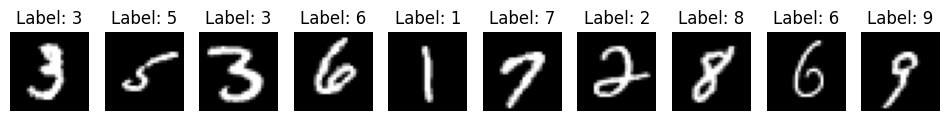

In [ ]:
# Show some of the images
num_images_to_show = 10

plt.figure(figsize=(12, 6))
for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i+1)
    plt.imshow(train_data[i+10], cmap='gray')
    plt.title(f"Label: {train_labels[i+10]}")
    plt.axis('off')

plt.show()

In [ ]:
def select_samples_per_class(x_data, y_data, num_samples):
    selected_indices = []
    for class_label in np.unique(y_data):
        class_indices = np.where(y_data == class_label)[0]
        selected_indices.extend(np.random.choice(class_indices, num_samples, replace=False))
    x_data = np.array(x_data)
    return x_data[selected_indices], y_data[selected_indices]

# Choose 200 examples per class for the training set
num_train_samples_per_class = 500
x_train_selected, y_train_selected = select_samples_per_class(train_vectors, train_labels, num_train_samples_per_class)

# Choose 50 examples per class for the test subset
num_test_samples_per_class = 100
x_test_selected, y_test_selected = select_samples_per_class(test_vectors, test_labels, num_test_samples_per_class)
print(x_train_selected.shape)

(5000, 784)


In [ ]:
# Shuffle the selected training data
shuffle_indices = np.random.permutation(len(x_train_selected))
x_train_subset = x_train_selected[shuffle_indices]
y_train_subset = y_train_selected[shuffle_indices]

# Split the test subset into features and labels
x_test_subset, y_test_subset = x_test_selected, y_test_selected


# # Normalize the pixel values to the range [0, 1]
x_train_subset = x_train_subset.astype('float32') / 255.0
x_test_subset = x_test_subset.astype('float32') / 255.0


In [ ]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = x_train_subset, x_test_subset, y_train_subset , y_test_subset

In [ ]:
# Split dataset into train and test sets
# X_train, X_test, y_train, y_test = train_vectors, test_vectors, train_labels , test_labels

In [ ]:
print(X_train.shape,X_test.shape)

(5000, 784) (1000, 784)


# OVR single model

In [ ]:
# Train a Logistic Regression classifier
clf = SVC(C=1, kernel='rbf',decision_function_shape='ovr', gamma=0.1)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

In [ ]:
y_pred_train = clf.predict(X_train)

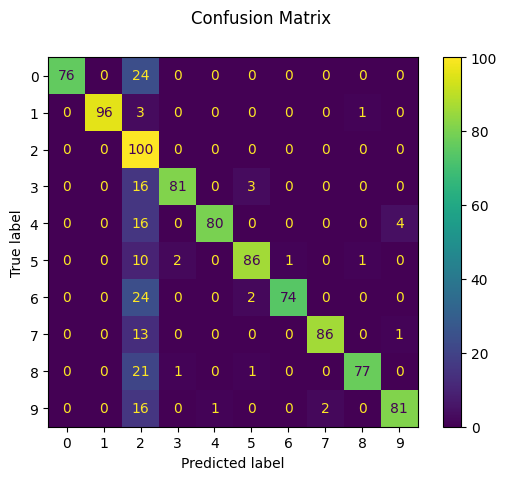

Train Accuracy: 1.00
Test Accuracy: 0.84
precision : 0.837
recall :  0.837
f1_score:  0.8370000000000001


In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

# Accuracy
Acc_train = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {Acc_train:.2f}")
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
# precision
precision = precision_score(y_test , y_pred , average = 'micro')
print("precision :" , precision)
# recall
recall = recall_score(y_test, y_pred , average='micro')
print("recall : " , recall)
# F1 score
print("f1_score: " , f1_score(y_test, y_pred , average='micro'))

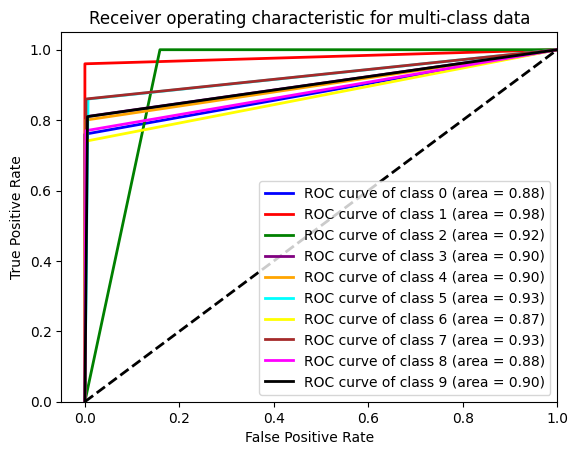

AUC: 0.9094444444444445


In [ ]:
# binarize the output
# remove this and at last calculate to not come binarize values before this part

binarize_prediction_values = label_binarize(y_pred, classes=[0, 1, 2 , 3 , 4 , 5 , 6 , 7 ,8 , 9])
binarizes_test_labels = label_binarize(y_test, classes=[0, 1, 2 , 3 , 4 , 5 , 6 , 7 ,8 , 9])
n_classes = 10

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(binarizes_test_labels[:, i], binarize_prediction_values[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','purple', 'orange', 'cyan','yellow', 'brown', 'magenta','black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()


# AUC
AUC= roc_auc_score(binarizes_test_labels, binarize_prediction_values , multi_class="ovr", average="macro")
print("AUC:" , AUC)